# Scenario A - Noise Level Variation (plots)

This file is used to evaluate the inference (numerical) results.

The model used in the inference of the parameters is formulated as follows: 

\begin{equation}
\large y = f(x) = \sum\limits_{m=1}^M \big[A_m \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}\big] + \epsilon
\end{equation}

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.8


## Scenario results

In [2]:
adapt_raw = np.array([[6,6,6,5],
                      [6,5,6,4],
                      [3,4,4,3]])

advi_raw = np.array([[6,7,6,6],
                     [4,5,4,2],
                     [4,4,4,4]])

auto_raw = np.array([[5,3,3,3],
                     [3,6,5,3],
                     [3,4,4,3]])

auto_mean = auto_raw.mean(axis=1)
advi_mean = advi_raw.mean(axis=1)
adapt_mean = adapt_raw.mean(axis=1)

auto_std = auto_raw.std(axis=1)
advi_std = advi_raw.std(axis=1)
adapt_std = adapt_raw.std(axis=1)

tauto_mean = auto_raw.sum(axis=0).mean()
tadvi_mean = advi_raw.sum(axis=0).mean()
tadapt_mean = adapt_raw.sum(axis=0).mean()

tauto_std = auto_raw.sum(axis=0).std()
tadvi_std = advi_raw.sum(axis=0).std()
tadapt_std = adapt_raw.sum(axis=0).std()

## Barplot by init method and noise level

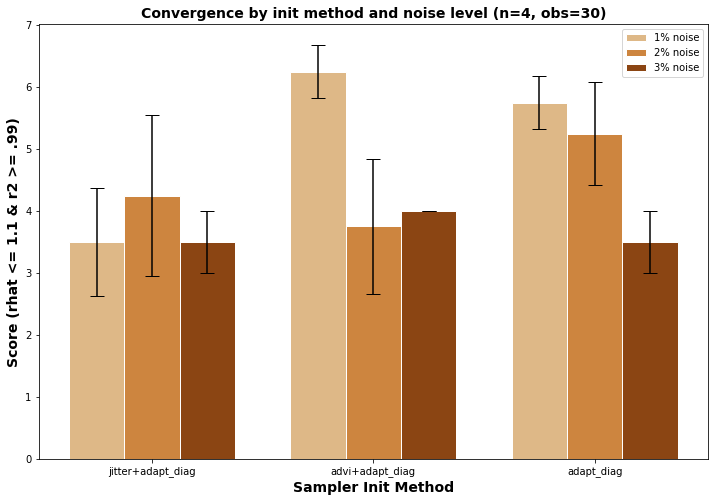

In [12]:
plt.figure(figsize=(12, 8))

fsize = 14

plt.ylabel('Score (rhat <= 1.1 & r2 >= .99)', fontweight='bold', fontsize=fsize)
plt.title('Convergence by init method and noise level (n=4, obs=30)', fontweight='bold', fontsize=fsize)

# set width of bar
barWidth = 0.25

# set height of bar
bars1, err1 = ([auto_mean[0], advi_mean[0], adapt_mean[0]], [auto_std[0], advi_std[0], adapt_std[0]])
bars2, err2 = ([auto_mean[1], advi_mean[1], adapt_mean[1]], [auto_std[1], advi_std[1], adapt_std[1]])
bars3, err3 = ([auto_mean[2], advi_mean[2], adapt_mean[2]], [auto_std[2], advi_std[2], adapt_std[2]])

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

caps = 7

# Make the plot
plt.bar(r1, bars1, yerr=err1, capsize=caps, color='burlywood', width=barWidth, 
        edgecolor='white', label='1% noise')
plt.bar(r2, bars2, yerr=err2, capsize=caps, color='peru', width=barWidth, 
        edgecolor='white', label='2% noise')
plt.bar(r3, bars3, yerr=err3, capsize=caps, color='saddlebrown', width=barWidth, 
        edgecolor='white', label='3% noise')

# Add xticks on the middle of the group bars
plt.xlabel('Sampler Init Method', fontweight='bold', fontsize=fsize)
plt.xticks([r + barWidth for r in range(len(bars1))], ['jitter+adapt_diag', 'advi+adapt_diag', 'adapt_diag'])

# Create legend & Show graphic
plt.legend()
plt.show()

## Barplot by init method

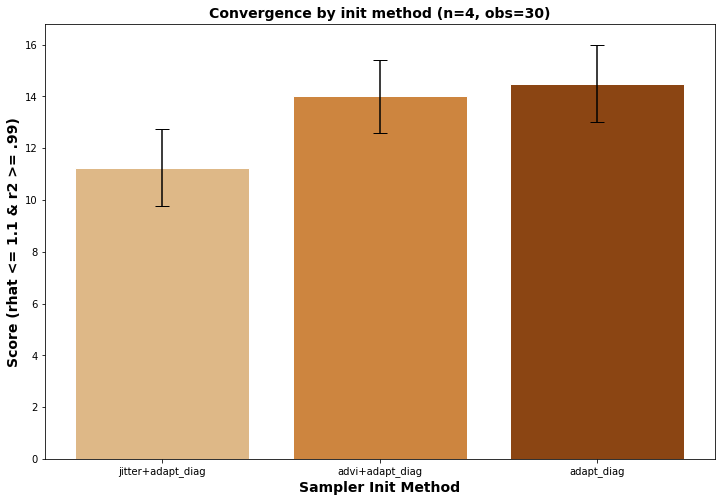

In [13]:
plt.figure(figsize=(12, 8))

fsize = 14

plt.ylabel('Score (rhat <= 1.1 & r2 >= .99)', fontweight='bold', fontsize=fsize)
plt.title('Convergence by init method (n=4, obs=30)', fontweight='bold',  fontsize=fsize)

# set height of bar
bars, errs = ([tauto_mean, tadvi_mean, tadapt_mean], [tauto_std, tadvi_std, tadapt_std])

# Set position of bar on X axis
y_pos = np.arange(len(bars))

colors = ['burlywood','peru','saddlebrown']
caps = 7
 
# Make the plot
plt.bar(y_pos, bars, yerr=errs, capsize=caps, color=colors, edgecolor='white')

# Add xticks on the middle of the group bars
plt.xlabel('Sampler Init Method', fontweight='bold', fontsize=fsize)
plt.xticks(y_pos, ['jitter+adapt_diag', 'advi+adapt_diag', 'adapt_diag'])

# Create legend & Show graphic
plt.show()